<a href="https://colab.research.google.com/github/Sahan-Daksh/Intellihack_44Below_Task2/blob/main/Intellihack_44Below_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing the necessary modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

### Loading the Dataset

In [5]:
df = pd.read_csv("/content/customer_behavior_analytcis.csv")
df.head()

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts,customer_id
0,7.0,129.34,52.17,18.0,0.0,CM00000
1,22.0,24.18,9.19,15.0,7.0,CM00001
2,2.0,32.18,90.69,50.0,2.0,CM00002
3,25.0,26.85,11.22,16.0,10.0,CM00003
4,7.0,125.45,34.19,30.0,3.0,CM00004


### Checking for the null values

In [8]:
print(df.info())
print(df.isnull().sum())
print(df.isnull().sum() / len(df) * 100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_purchases   979 non-null    float64
 1   avg_cart_value    979 non-null    float64
 2   total_time_spent  999 non-null    float64
 3   product_click     979 non-null    float64
 4   discount_counts   999 non-null    float64
 5   customer_id       999 non-null    object 
dtypes: float64(5), object(1)
memory usage: 47.0+ KB
None
total_purchases     20
avg_cart_value      20
total_time_spent     0
product_click       20
discount_counts      0
customer_id          0
dtype: int64
total_purchases     2.002002
avg_cart_value      2.002002
total_time_spent    0.000000
product_click       2.002002
discount_counts     0.000000
customer_id         0.000000
dtype: float64


In [7]:
print(df.describe())

       total_purchases  avg_cart_value  total_time_spent  product_click  \
count       979.000000      979.000000        999.000000     979.000000   
mean         11.570991       75.457978         49.348759      28.237998   
std           7.016327       55.067835         32.730973      16.296384   
min           0.000000       10.260000          5.120000       4.000000   
25%           6.000000       33.130000         22.375000      16.000000   
50%          10.000000       49.380000         40.360000      21.000000   
75%          17.000000      121.255000         77.170000      45.000000   
max          32.000000      199.770000        119.820000      73.000000   

       discount_counts  
count       999.000000  
mean          4.313313  
std           4.532772  
min           0.000000  
25%           1.000000  
50%           2.000000  
75%           8.000000  
max          21.000000  


### Adding KNNImputer to impute those null values

In [13]:
from sklearn.impute import KNNImputer

# Create a copy for imputation
df_imputed = df.copy()

# Initialize the KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Apply imputation to all numeric columns at once (excluding customer_id)
numeric_columns = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_columns]
df_imputed_array = imputer.fit_transform(df_numeric)

# Convert back to DataFrame with original column names
df_imputed = pd.DataFrame(df_imputed_array, columns=numeric_columns)

### Verifying if there are any null values after KNNImputer

In [14]:
# Check that there are no more missing values
print(df_imputed.isnull().sum())

total_purchases     0
avg_cart_value      0
total_time_spent    0
product_click       0
discount_counts     0
dtype: int64


### Comparing the distributions before and after the imputation

       total_purchases  avg_cart_value  total_time_spent  product_click  \
count       999.000000      999.000000        999.000000     999.000000   
mean         11.574174       75.584140         49.348759      28.195395   
std           6.990650       54.999912         32.730973      16.268677   
min           0.000000       10.260000          5.120000       4.000000   
25%           6.000000       33.245000         22.375000      16.000000   
50%          10.000000       49.510000         40.360000      21.000000   
75%          17.000000      122.365000         77.170000      45.000000   
max          32.000000      199.770000        119.820000      73.000000   

       discount_counts  
count       999.000000  
mean          4.313313  
std           4.532772  
min           0.000000  
25%           1.000000  
50%           2.000000  
75%           8.000000  
max          21.000000  


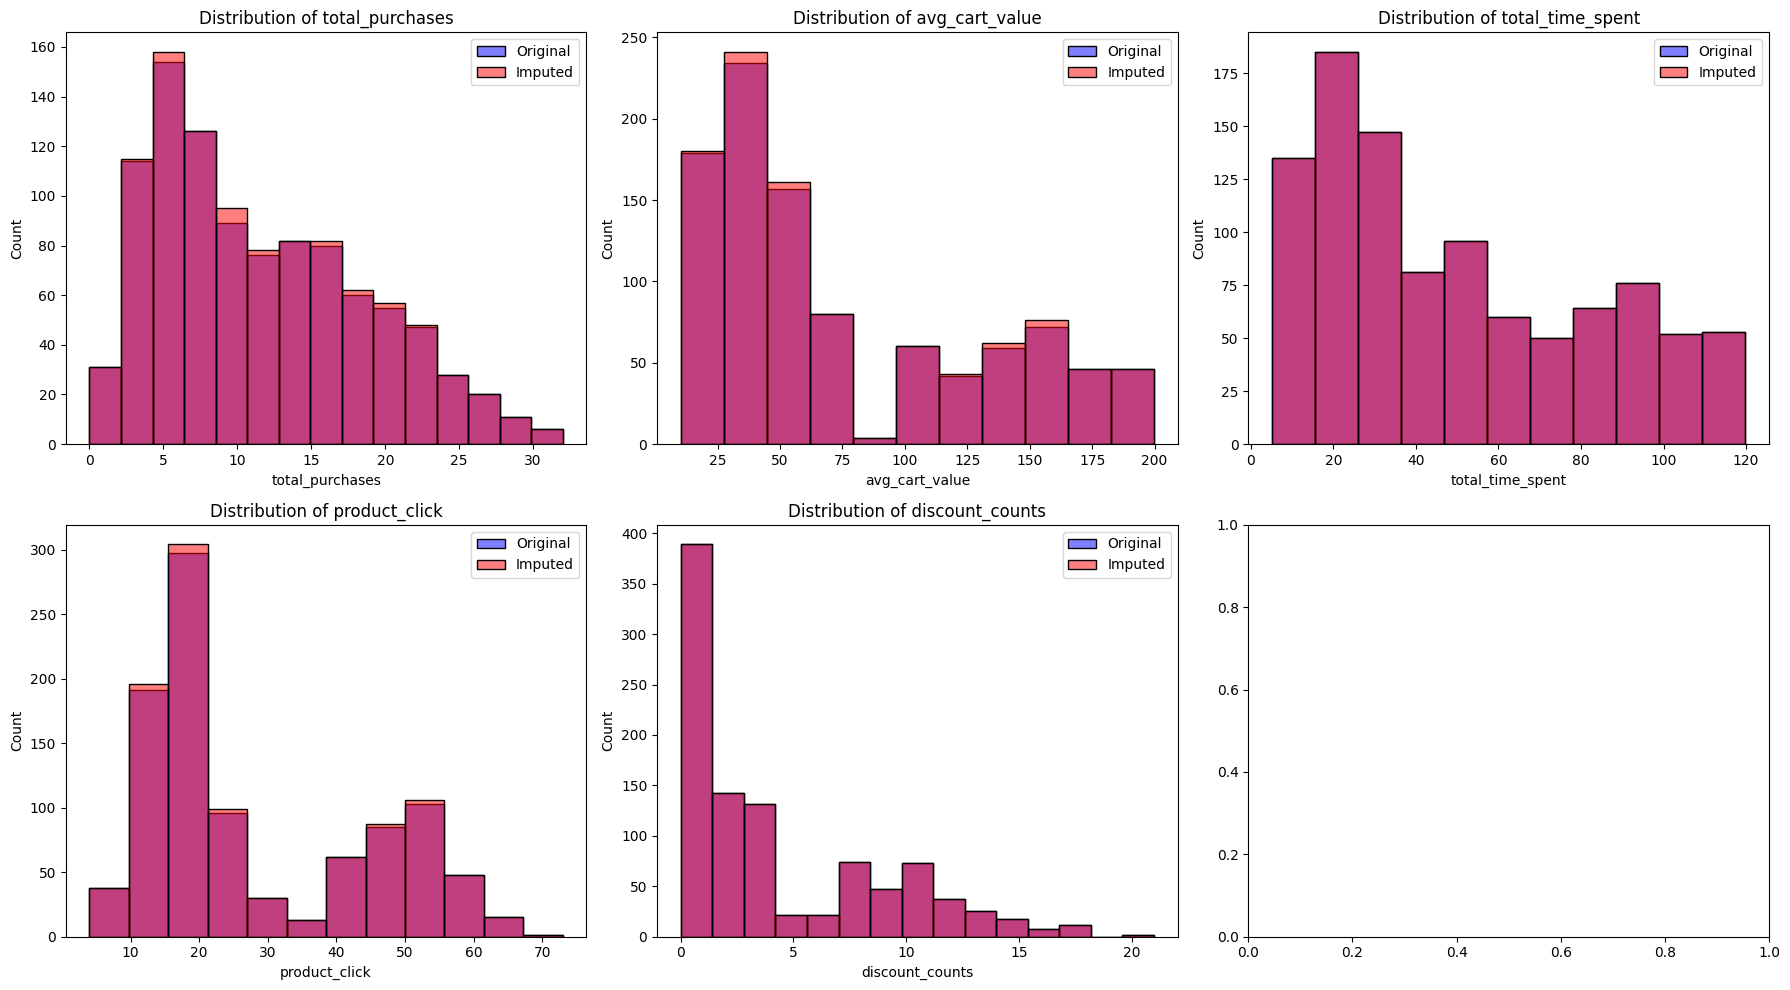

In [15]:
# Look at summary statistics of the imputed dataset
print(df_imputed.describe())

# You can also compare the distributions before and after imputation
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(['total_purchases', 'avg_cart_value', 'total_time_spent',
                         'product_click', 'discount_counts']):
    # Plot original data distribution (with missing values)
    sns.histplot(df[col].dropna(), ax=axes[i], color='blue', alpha=0.5, label='Original')
    # Plot imputed data distribution
    sns.histplot(df_imputed[col], ax=axes[i], color='red', alpha=0.5, label='Imputed')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [16]:
df_imputed.head()

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts
0,7.0,129.34,52.17,18.0,0.0
1,22.0,24.18,9.19,15.0,7.0
2,2.0,32.18,90.69,50.0,2.0
3,25.0,26.85,11.22,16.0,10.0
4,7.0,125.45,34.19,30.0,3.0


### Checking if there any outliers

Number of outliers in each feature:
total_purchases: 0 outliers
avg_cart_value: 0 outliers
total_time_spent: 0 outliers
product_click: 0 outliers
discount_counts: 2 outliers


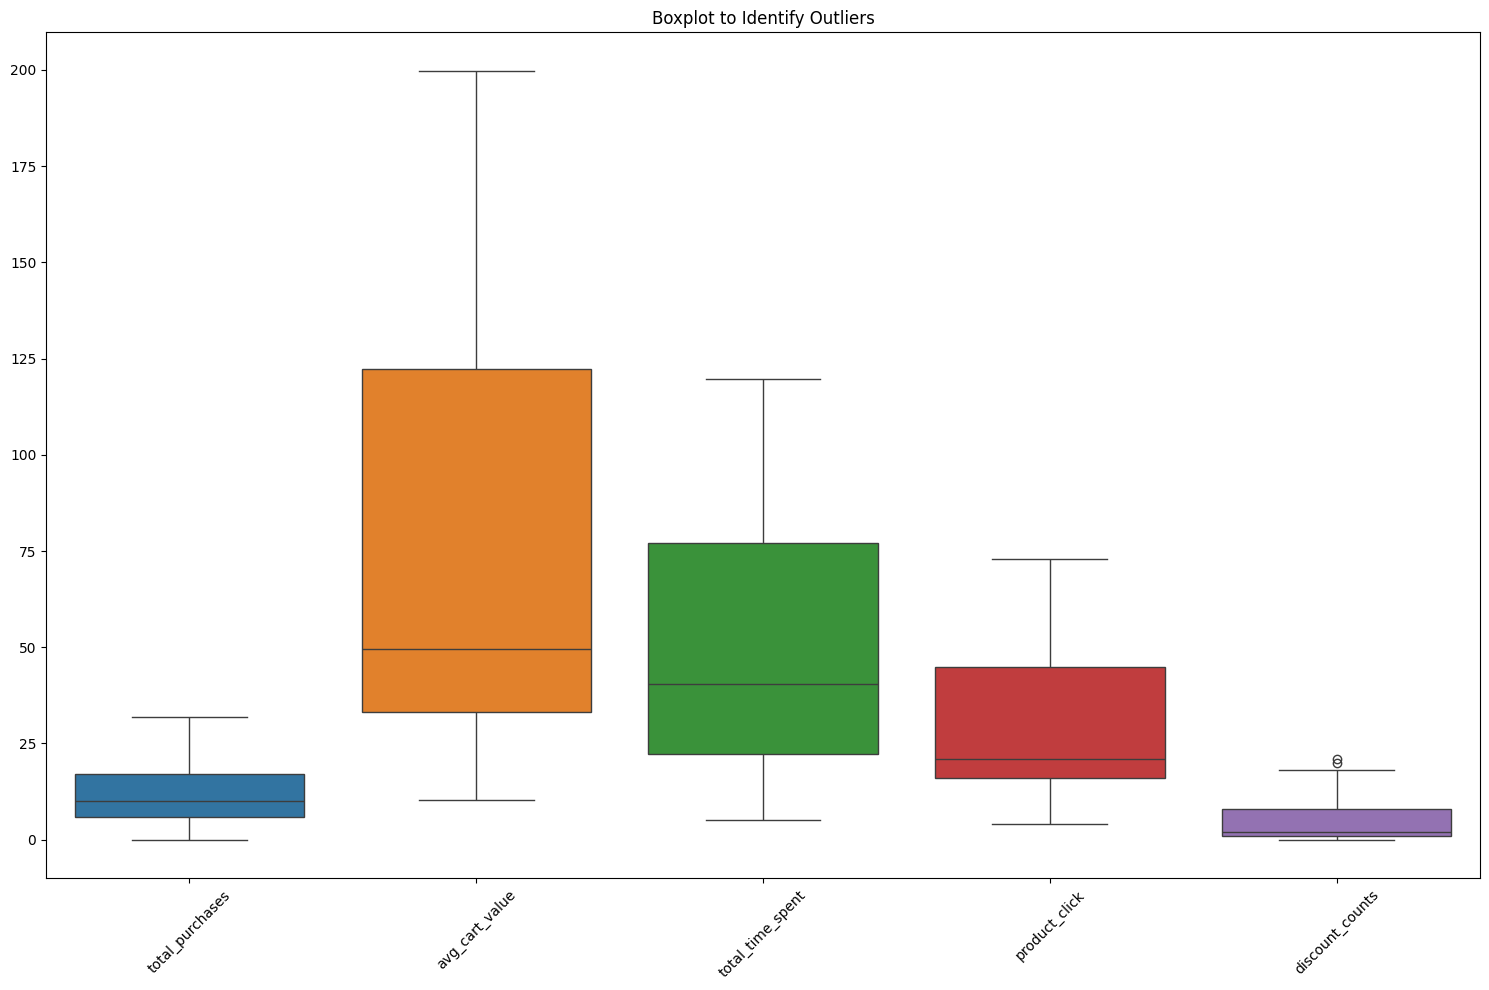

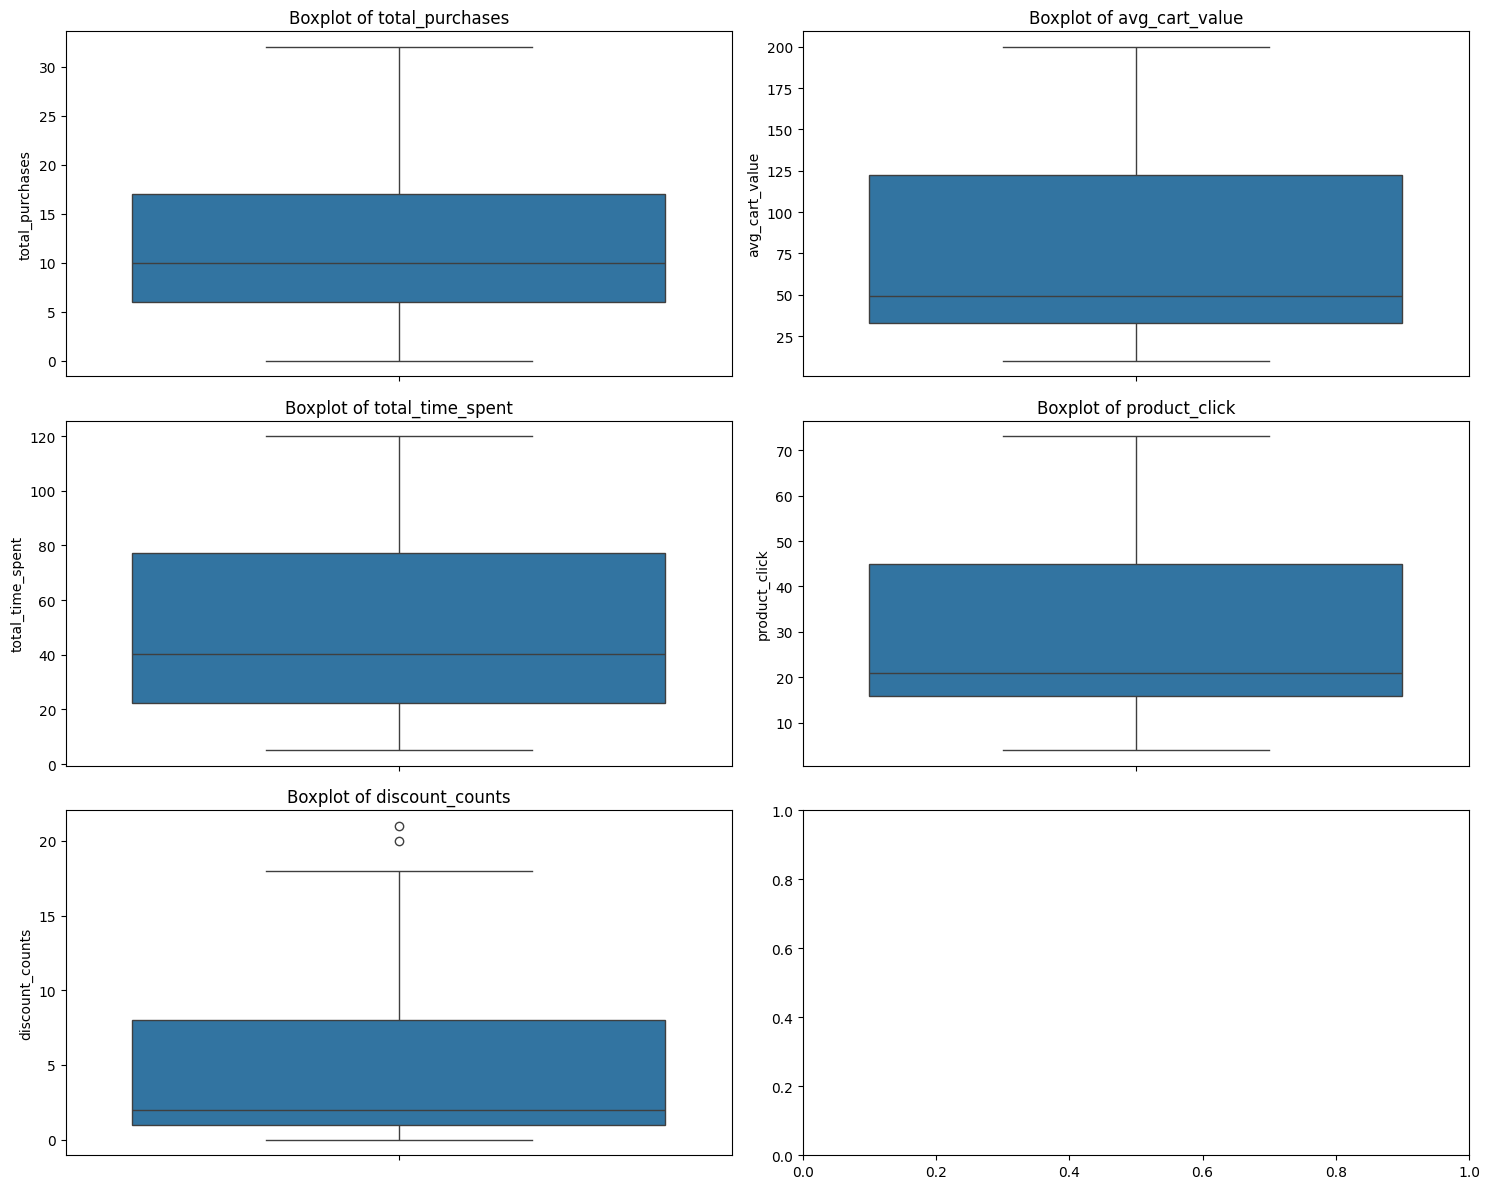

In [19]:
# Check for outliers using boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_imputed)  # No need to drop customer_id again
plt.title('Boxplot to Identify Outliers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('outliers_boxplot.png')

# You can also check outliers for each feature individually
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(df_imputed.columns):
    if i < len(axes):
        sns.boxplot(y=df_imputed[col], ax=axes[i])
        axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.savefig('individual_outliers_boxplot.png')

# Identify outliers using IQR method
def find_outliers_iqr(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = ((data < lower_bound) | (data > upper_bound)).sum()
    return outliers

# Count outliers in each feature
outliers_count = {}
for col in df_imputed.columns:
    outliers_count[col] = find_outliers_iqr(df_imputed[col])

print("Number of outliers in each feature:")
for col, count in outliers_count.items():
    print(f"{col}: {count} outliers")

## Exploratory Data Analysis

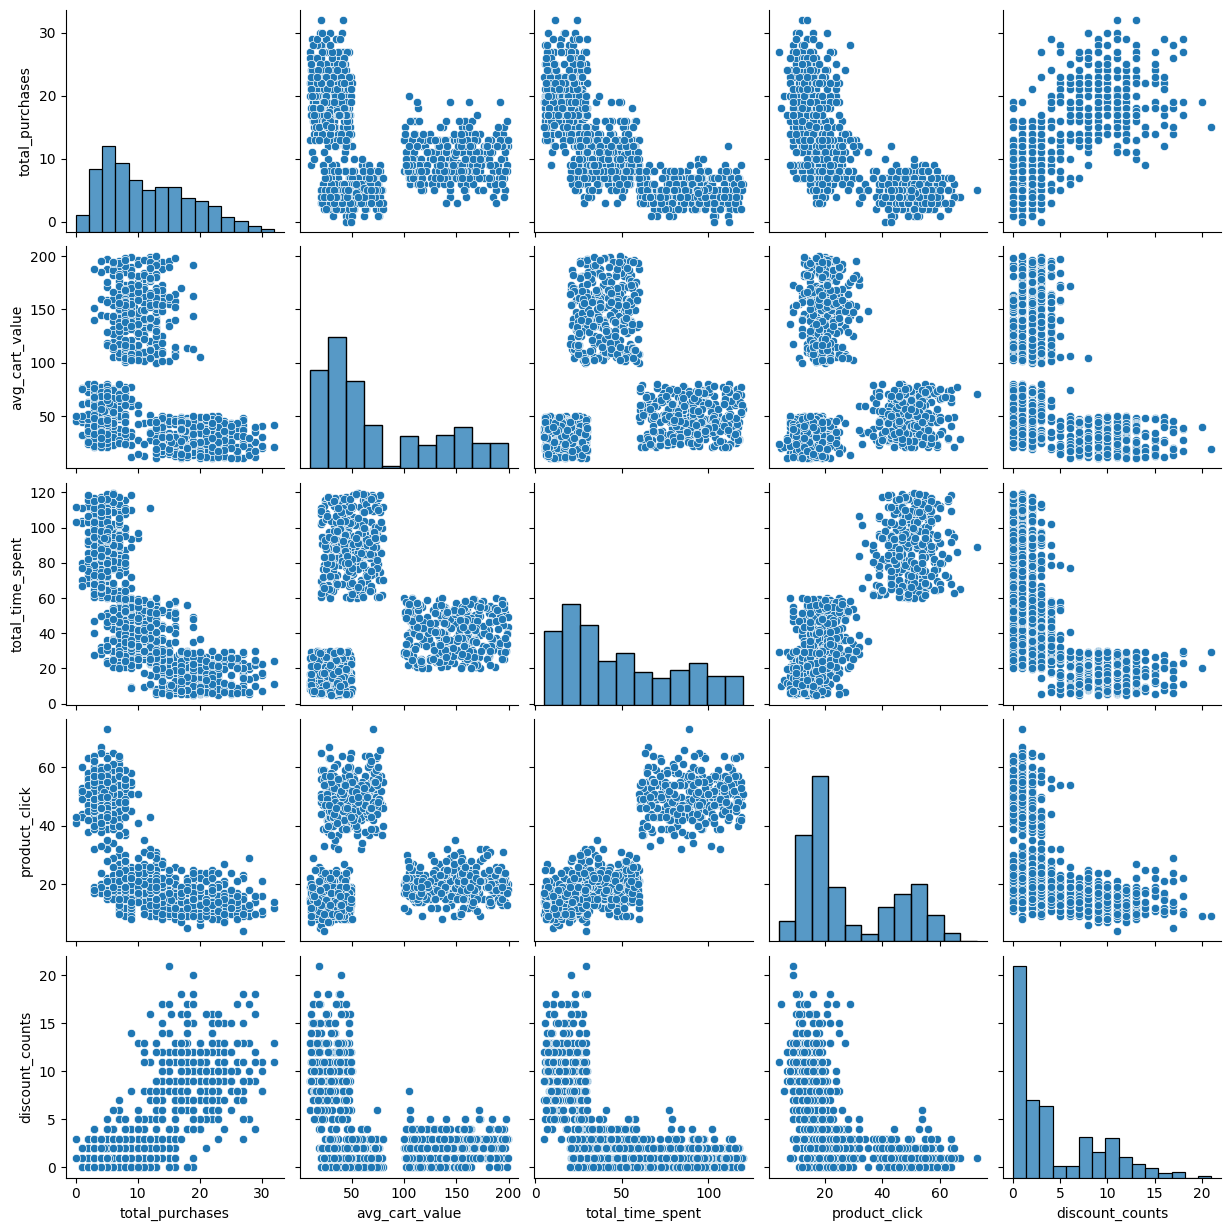

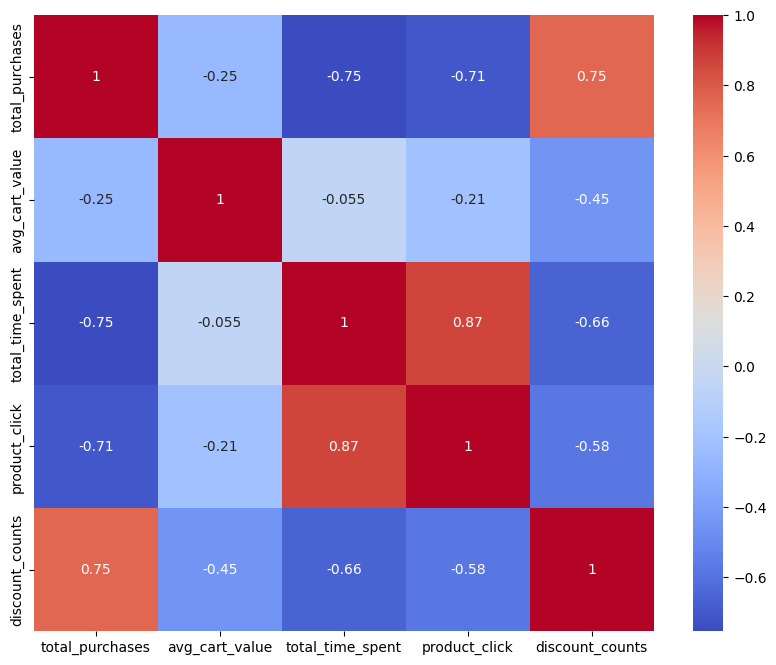

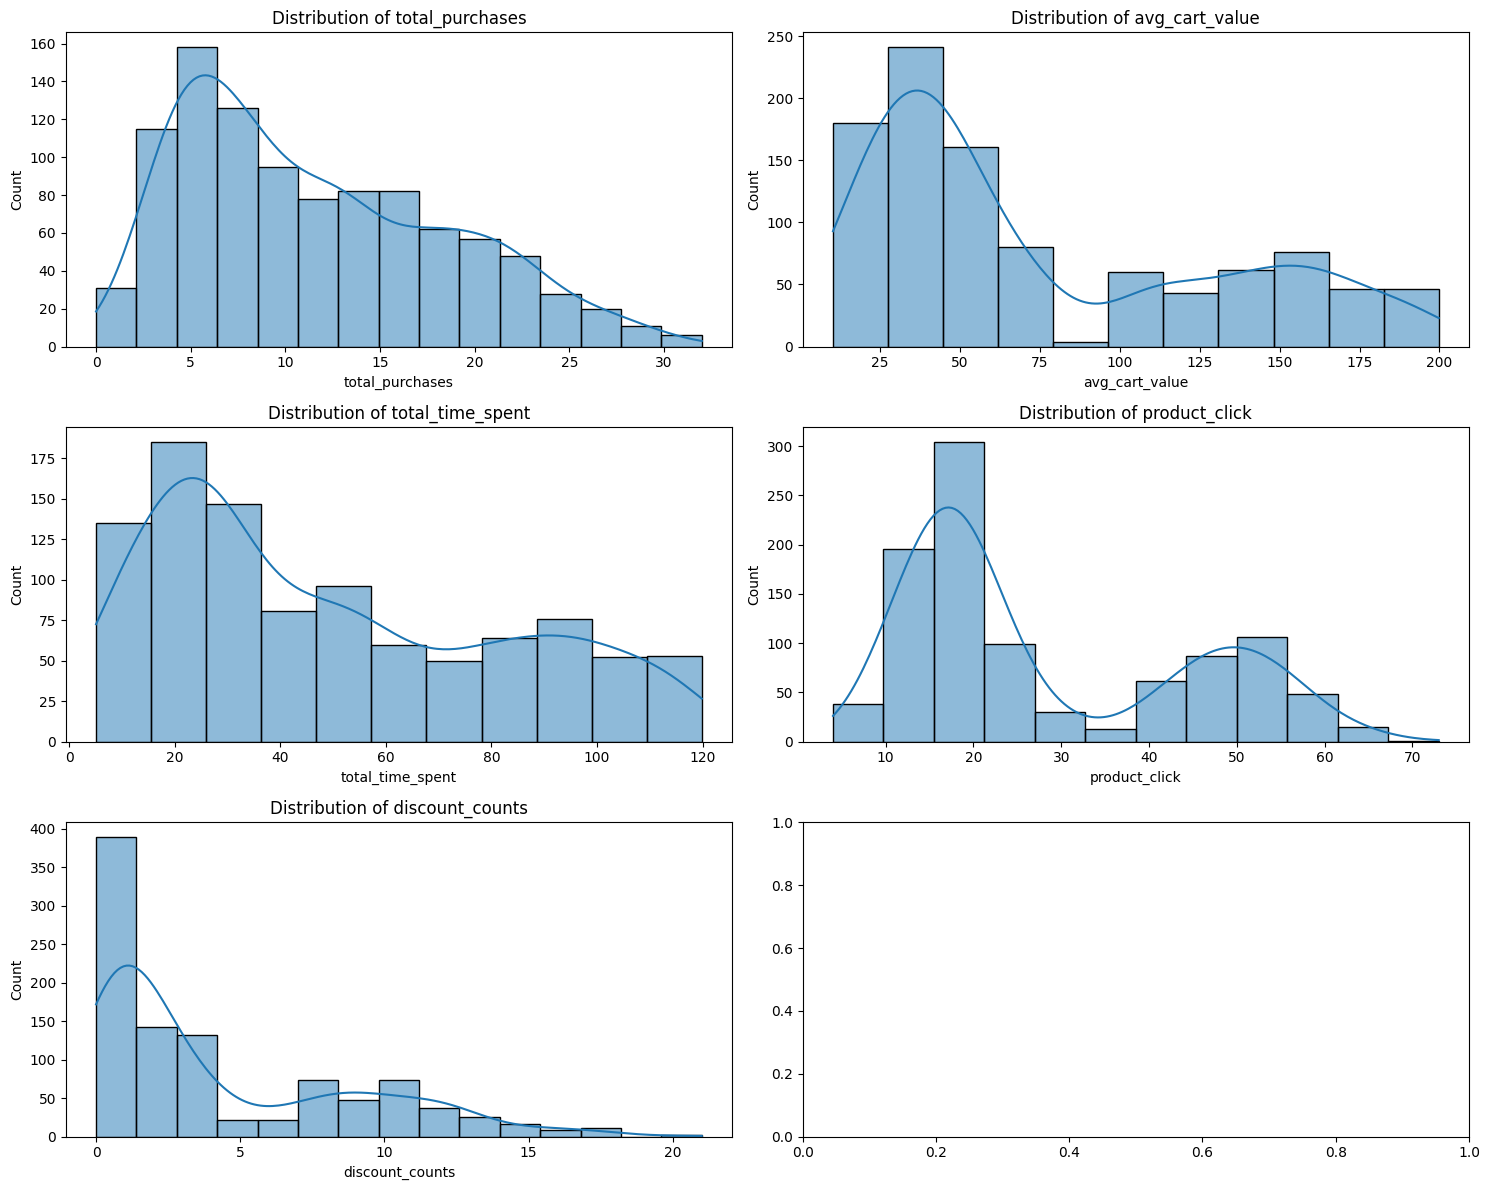

In [20]:
# Pairplot to visualize relationships between features
sns.pairplot(df_imputed)
plt.savefig('pairplot.png')

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_imputed.corr(), annot=True, cmap='coolwarm')
plt.savefig('correlation_heatmap.png')

# Distribution of each feature
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(df_imputed.columns):
    if i < len(axes):
        sns.histplot(df_imputed[col], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.savefig('feature_distributions.png')

## Data Scaling

In [21]:
# Initialize the scaler
scaler = StandardScaler()

# Scale the features
df_scaled = pd.DataFrame(
    scaler.fit_transform(df_imputed),
    columns=df_imputed.columns
)

# Check the scaled data
print(df_scaled.describe())

       total_purchases  avg_cart_value  total_time_spent  product_click  \
count     9.990000e+02    9.990000e+02      9.990000e+02   9.990000e+02   
mean      1.493633e-16   -1.724791e-16     -1.280257e-16   7.823794e-17   
std       1.000501e+00    1.000501e+00      1.000501e+00   1.000501e+00   
min      -1.656494e+00   -1.188308e+00     -1.351958e+00  -1.487983e+00   
25%      -7.977750e-01   -7.701894e-01     -8.245178e-01  -7.499998e-01   
50%      -2.252956e-01   -4.743135e-01     -2.747630e-01  -4.425068e-01   
75%       7.765434e-01    8.509885e-01      8.504231e-01   1.033460e+00   
max       2.923341e+00    2.259059e+00      2.154123e+00   2.755421e+00   

       discount_counts  
count     9.990000e+02  
mean      6.045659e-17  
std       1.000501e+00  
min      -9.520606e-01  
25%      -7.313345e-01  
50%      -5.106085e-01  
75%       8.137477e-01  
max       3.683186e+00  


## Using K-Means for the Clustering

### Verify Optimal Number of Clusters

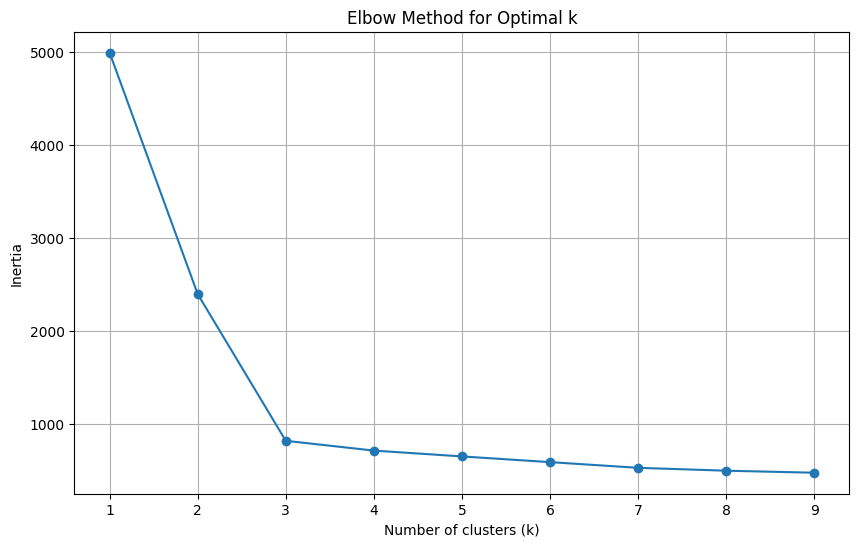

In [22]:
# Verify that 3 is the optimal number of clusters
inertia = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'o-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.savefig('elbow_curve.png')
plt.show()

### Calculate Silhouette Scores

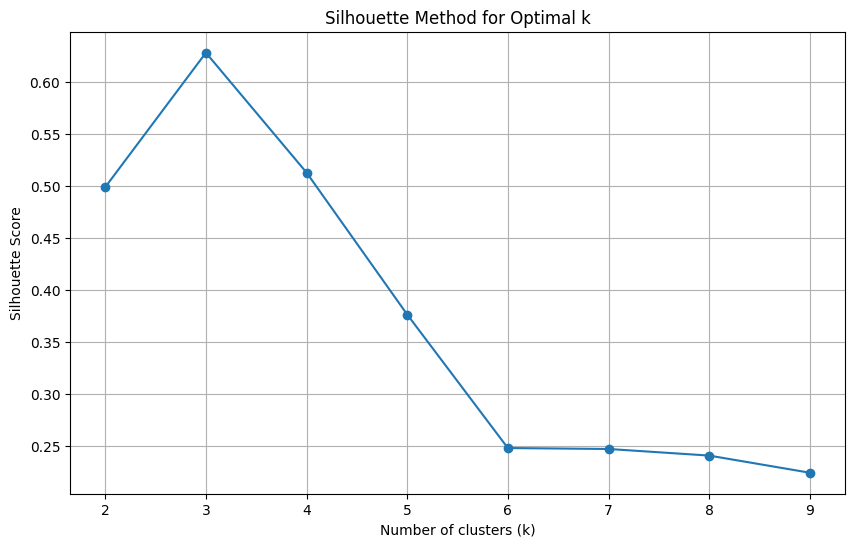

In [23]:
# Calculate silhouette scores for different k values
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 10):  # Silhouette score requires at least 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_scaled)
    silhouette_scores.append(silhouette_score(df_scaled, cluster_labels))

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), silhouette_scores, 'o-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.grid(True)
plt.savefig('silhouette_scores.png')
plt.show()

### Apply K-means with 3 Clusters

In [24]:
# Apply K-means with 3 clusters (as per your task requirement)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_scaled['cluster'] = kmeans.fit_predict(df_scaled)

# Get cluster centers
cluster_centers = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=df_imputed.columns
)

# Display cluster centers
print("Cluster Centers:")
print(cluster_centers)

Cluster Centers:
   total_purchases  avg_cart_value  total_time_spent  product_click  \
0        10.177177      147.229405         40.389730      19.903303   
1        19.684685       30.458432         17.511682      14.945345   
2         4.860661       49.064583         90.144865      49.737538   

   discount_counts  
0         1.945946  
1         9.969970  
2         1.024024  


### Analyze Cluster Profiles

In [25]:
# Add cluster labels to the original dataframe
df_imputed['cluster'] = df_scaled['cluster']

# Analyze cluster profiles
cluster_profiles = df_imputed.groupby('cluster').mean()
print("\nCluster Profiles:")
print(cluster_profiles)


Cluster Profiles:
         total_purchases  avg_cart_value  total_time_spent  product_click  \
cluster                                                                     
0              10.177177      147.229405         40.389730      19.903303   
1              19.684685       30.458432         17.511682      14.945345   
2               4.860661       49.064583         90.144865      49.737538   

         discount_counts  
cluster                   
0               1.945946  
1               9.969970  
2               1.024024  


### Visualize Cluster Profiles with Radar Chart

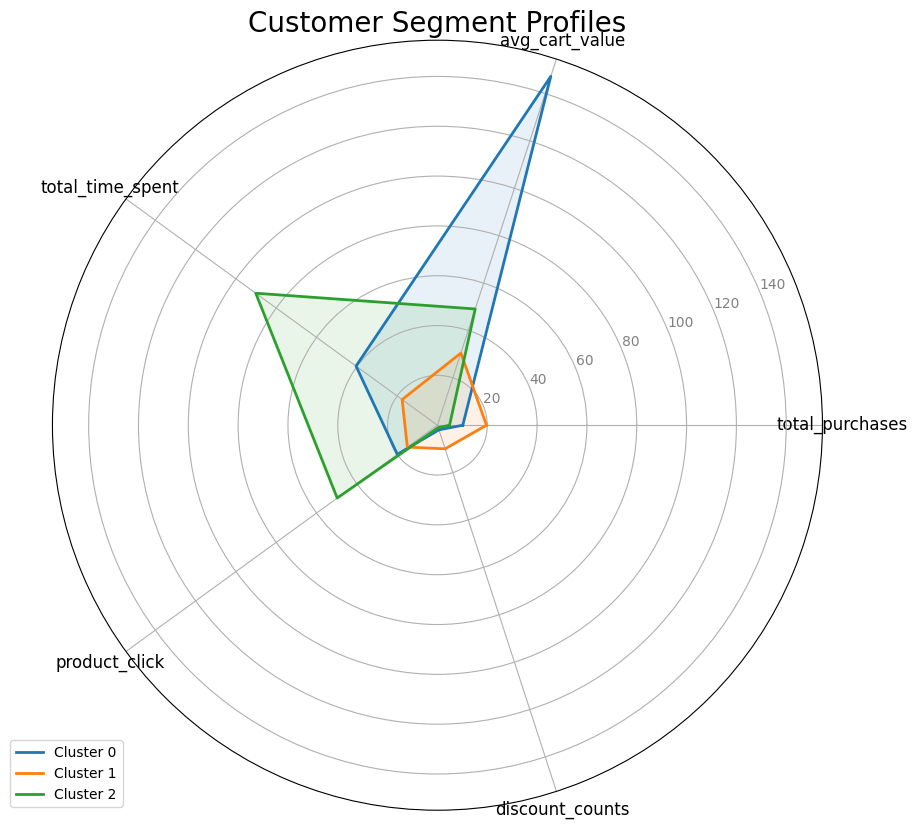

In [26]:
# Visualize cluster profiles with a radar chart

# Set data
categories = list(df_imputed.columns[:-1])  # Exclude the cluster column
N = len(categories)

# Create angles for each feature
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Close the loop

# Create figure
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Add each cluster
for i in range(3):
    values = cluster_profiles.iloc[i].values.flatten().tolist()
    values += values[:1]  # Close the loop

    # Plot values
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'Cluster {i}')
    ax.fill(angles, values, alpha=0.1)

# Add feature labels
plt.xticks(angles[:-1], categories, size=12)
plt.yticks(color='grey', size=10)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.title('Customer Segment Profiles', size=20)
plt.savefig('cluster_profiles_radar.png')
plt.show()

### Map Clusters to Customer Segments

In [27]:
# Based on the cluster profiles, map clusters to segments
# Example mapping (adjust based on your actual results):
segment_mapping = {
    0: 'Window Shoppers',  # High time_spent and product_click, low purchases
    1: 'Bargain Hunters',  # High discount_counts, moderate purchases
    2: 'High Spenders'     # High avg_cart_value, low discount_counts
}

# Add segment labels to the dataframe
df_imputed['customer_segment'] = df_imputed['cluster'].map(segment_mapping)

# Count customers in each segment
segment_counts = df_imputed['customer_segment'].value_counts()
print("\nCustomer Segment Distribution:")
print(segment_counts)


Customer Segment Distribution:
customer_segment
Window Shoppers    333
Bargain Hunters    333
High Spenders      333
Name: count, dtype: int64


### Visualize Segment Distribution

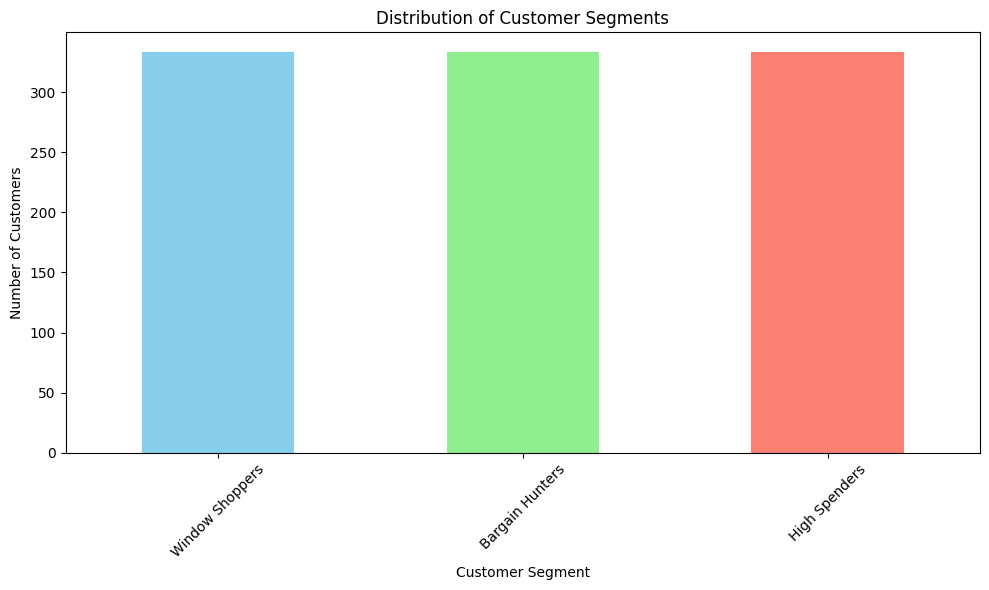

In [28]:
# Visualize the distribution
plt.figure(figsize=(10, 6))
segment_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Distribution of Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('segment_distribution.png')
plt.show()

## Model Evaluation

Final Silhouette Score for k=3: 0.6279


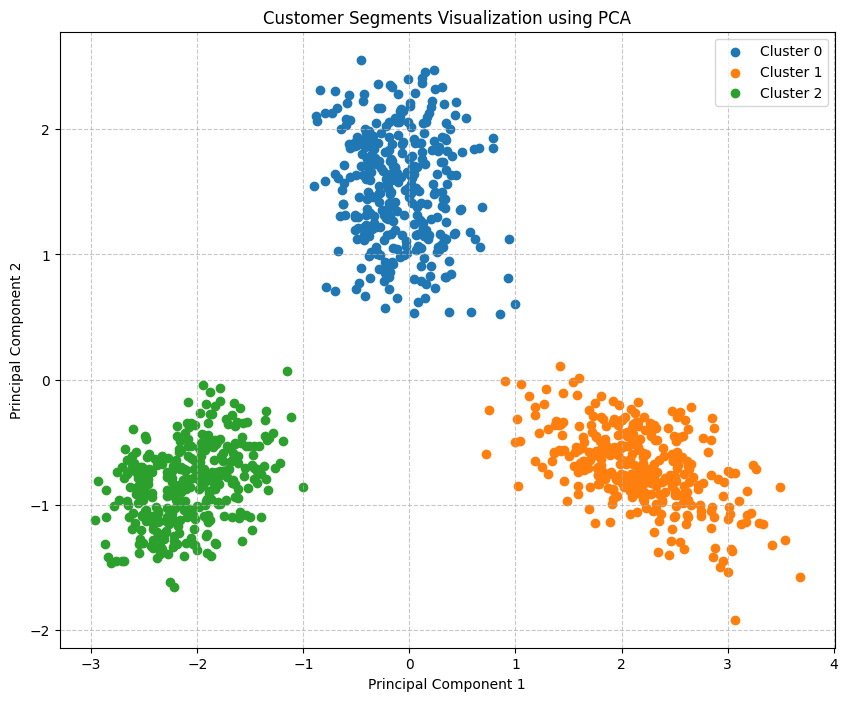

In [29]:
# Calculate the silhouette score for your final model (k=3)
from sklearn.metrics import silhouette_score
final_silhouette = silhouette_score(df_scaled.drop('cluster', axis=1), df_scaled['cluster'])
print(f"Final Silhouette Score for k=3: {final_silhouette:.4f}")

# Visualize the clusters in 2D using PCA
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled.drop('cluster', axis=1))

# Create a dataframe with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['cluster'] = df_scaled['cluster']

# Plot the clusters
plt.figure(figsize=(10, 8))
for cluster in pca_df['cluster'].unique():
    plt.scatter(
        pca_df[pca_df['cluster'] == cluster]['PC1'],
        pca_df[pca_df['cluster'] == cluster]['PC2'],
        label=f'Cluster {cluster}'
    )
plt.title('Customer Segments Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('cluster_pca_visualization.png')
plt.show()

## Identifying Clusters

Detailed Cluster Profiles:
        total_purchases            avg_cart_value                  \
                   mean  min   max           mean     min     max   
cluster                                                             
0             10.177177  3.0  20.0     147.229405  100.00  199.77   
1             19.684685  7.0  32.0      30.458432   10.26   49.92   
2              4.860661  0.0  12.0      49.064583   20.55   79.76   

        total_time_spent                product_click              \
                    mean    min     max          mean   min   max   
cluster                                                             
0              40.389730  20.01   59.88     19.903303   8.0  35.0   
1              17.511682   5.12   29.99     14.945345   4.0  29.0   
2              90.144865  60.00  119.82     49.737538  32.0  73.0   

        discount_counts             
                   mean  min   max  
cluster                             
0              1.945946  0.0   8

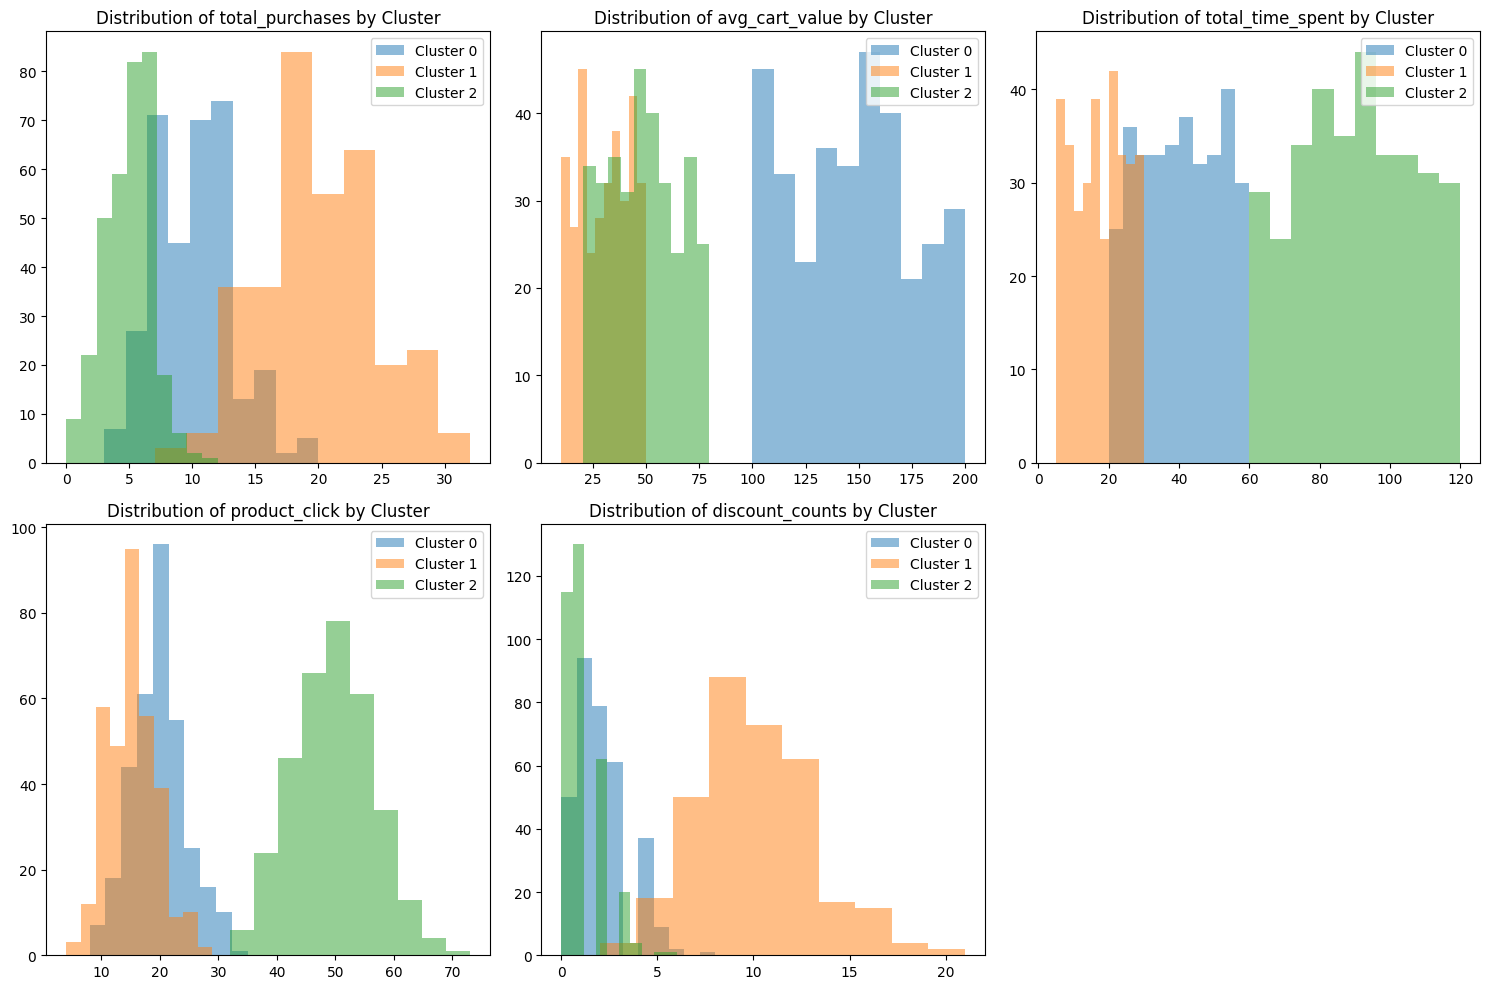


Customer Segment Profiles:
                  total_purchases  avg_cart_value  total_time_spent  \
customer_segment                                                      
Bargain Hunters         19.684685       30.458432         17.511682   
High Spenders            4.860661       49.064583         90.144865   
Window Shoppers         10.177177      147.229405         40.389730   

                  product_click  discount_counts  cluster  
customer_segment                                           
Bargain Hunters       14.945345         9.969970      1.0  
High Spenders         49.737538         1.024024      2.0  
Window Shoppers       19.903303         1.945946      0.0  


In [30]:
# Create a comprehensive profile of each cluster
cluster_summary = df_imputed.groupby('cluster').agg({
    'total_purchases': ['mean', 'min', 'max'],
    'avg_cart_value': ['mean', 'min', 'max'],
    'total_time_spent': ['mean', 'min', 'max'],
    'product_click': ['mean', 'min', 'max'],
    'discount_counts': ['mean', 'min', 'max']
})

print("Detailed Cluster Profiles:")
print(cluster_summary)

# Visualize key characteristics of each cluster
plt.figure(figsize=(15, 10))

# Create a subplot for each feature
features = df_imputed.columns[:-2]  # Exclude cluster and customer_segment
for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    for cluster in sorted(df_imputed['cluster'].unique()):
        data = df_imputed[df_imputed['cluster'] == cluster][feature]
        plt.hist(data, alpha=0.5, label=f'Cluster {cluster}')
    plt.title(f'Distribution of {feature} by Cluster')
    plt.legend()

plt.tight_layout()
plt.savefig('cluster_feature_distributions.png')
plt.show()

# Map clusters to customer segments based on their characteristics
# Adjust this mapping based on your actual results
segment_mapping = {
    0: 'Window Shoppers',  # Example: High time_spent, high product_click, low purchases
    1: 'Bargain Hunters',  # Example: High discount_counts, moderate purchases
    2: 'High Spenders'     # Example: High avg_cart_value, low discount_counts
}

# Add segment labels to the dataframe
df_imputed['customer_segment'] = df_imputed['cluster'].map(segment_mapping)

# Create a summary of each segment's characteristics
segment_profiles = df_imputed.groupby('customer_segment').mean()
print("\nCustomer Segment Profiles:")
print(segment_profiles)

## Final Visualization and Business Insights

<Figure size 1400x800 with 0 Axes>

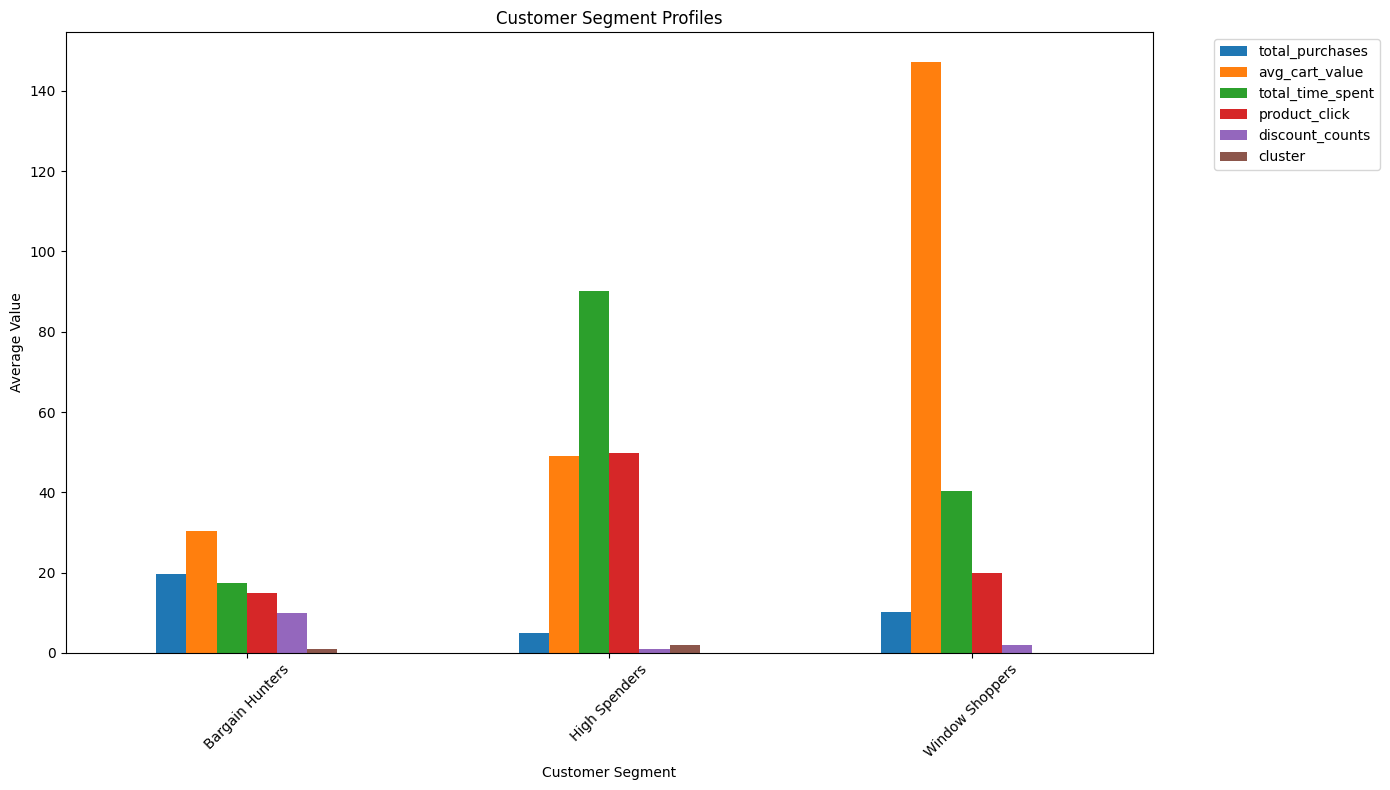

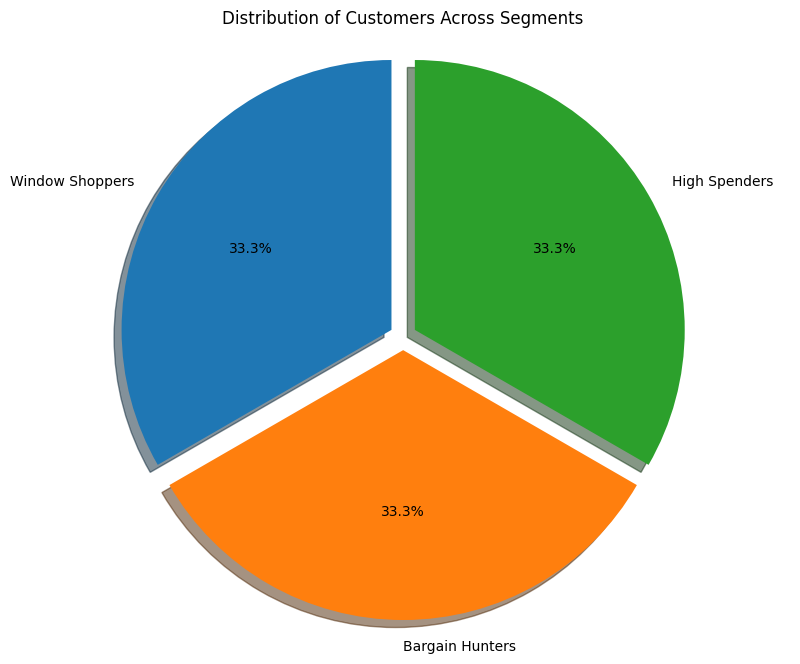

In [31]:
# Visualize segment profiles with a bar chart
plt.figure(figsize=(14, 8))
segment_profiles.plot(kind='bar', figsize=(14, 8))
plt.title('Customer Segment Profiles')
plt.xlabel('Customer Segment')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('segment_profiles_bar.png')
plt.show()

# Create a pie chart showing the distribution of customers across segments
plt.figure(figsize=(10, 8))
segment_counts = df_imputed['customer_segment'].value_counts()
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%',
        startangle=90, shadow=True, explode=[0.05]*len(segment_counts))
plt.title('Distribution of Customers Across Segments')
plt.axis('equal')
plt.savefig('segment_distribution_pie.png')
plt.show()

### Summary

In [32]:
# Print a summary of your analysis
print("Customer Segmentation Analysis Summary:")
print(f"- Total customers analyzed: {len(df_imputed)}")
print(f"- Number of segments identified: {len(df_imputed['customer_segment'].unique())}")
print("- Segmentation method: K-means clustering")
print(f"- Model quality (Silhouette Score): {final_silhouette:.4f}")
print("\nKey findings:")
for segment, count in segment_counts.items():
    percentage = (count / len(df_imputed)) * 100
    print(f"- {segment}: {count} customers ({percentage:.1f}%)")

Customer Segmentation Analysis Summary:
- Total customers analyzed: 999
- Number of segments identified: 3
- Segmentation method: K-means clustering
- Model quality (Silhouette Score): 0.6279

Key findings:
- Window Shoppers: 333 customers (33.3%)
- Bargain Hunters: 333 customers (33.3%)
- High Spenders: 333 customers (33.3%)
